In [1]:
from qiskit import *
from qiskit.test.mock import FakeAlmaden
from qiskit.pulse import DriveChannel, ControlChannel,AcquireChannel,MeasureChannel

In [2]:
backend = FakeAlmaden()

In [3]:
#******************** SWAP *********************
################################################

In [4]:
qc=QuantumCircuit(2,2)
qc.x(0)
qc.swap(0,1)
qc.measure([0,1],[0,1])

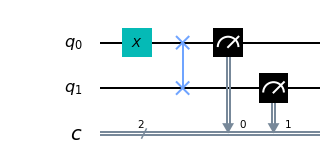

In [5]:
qc.draw(output='mpl')

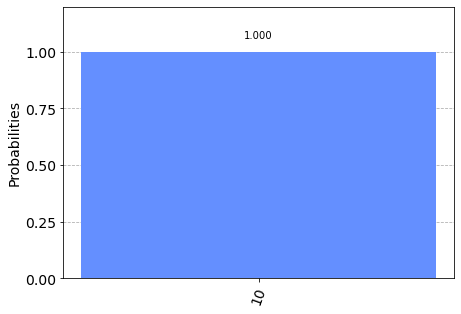

In [6]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

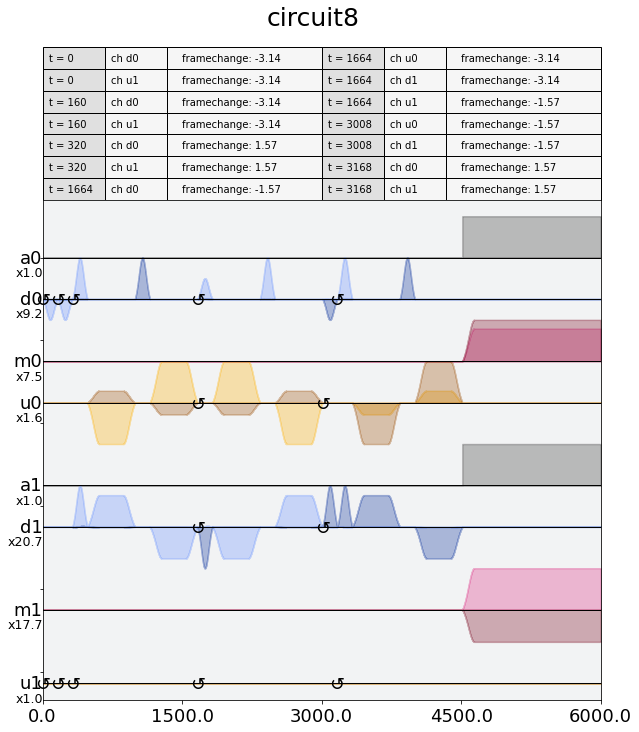

In [7]:
qc_=transpile(qc,backend)
pulse_schedule=schedule(qc_,backend)
pulse_schedule.filter(channels=[DriveChannel(0),DriveChannel(1), ControlChannel(0),ControlChannel(1),AcquireChannel(0),AcquireChannel(1),MeasureChannel(0),MeasureChannel(1)]).draw(plot_range=(0, 6000))

In [8]:
job = execute(qc_, backend=backend)    
try:
    result = job.result(timeout=120)
except:
    print(job.error_message())

In [9]:
print(result.get_counts())


{'00': 171, '11': 13, '01': 5, '10': 835}


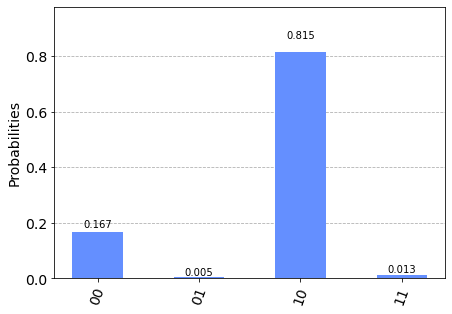

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())